In [1]:
# import liaberys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data (1)')
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [4]:
df.nunique()

footfall       99
tempMode        8
AQ              7
USS             7
CS              7
VOC             7
RP             71
IP              7
Temperature    24
fail            2
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
column_name = df.columns.to_list()

In [7]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,306.673383,3.726405,4.326617,2.939555,5.393425,2.844115,47.042418,4.564157,16.326617,0.416755
std,1083.144024,2.678334,1.438551,1.384458,1.269869,2.273751,16.431816,1.599452,5.976014,0.493283
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [8]:
df['fail'].value_counts(normalize=True)

fail
0    0.583245
1    0.416755
Name: proportion, dtype: float64

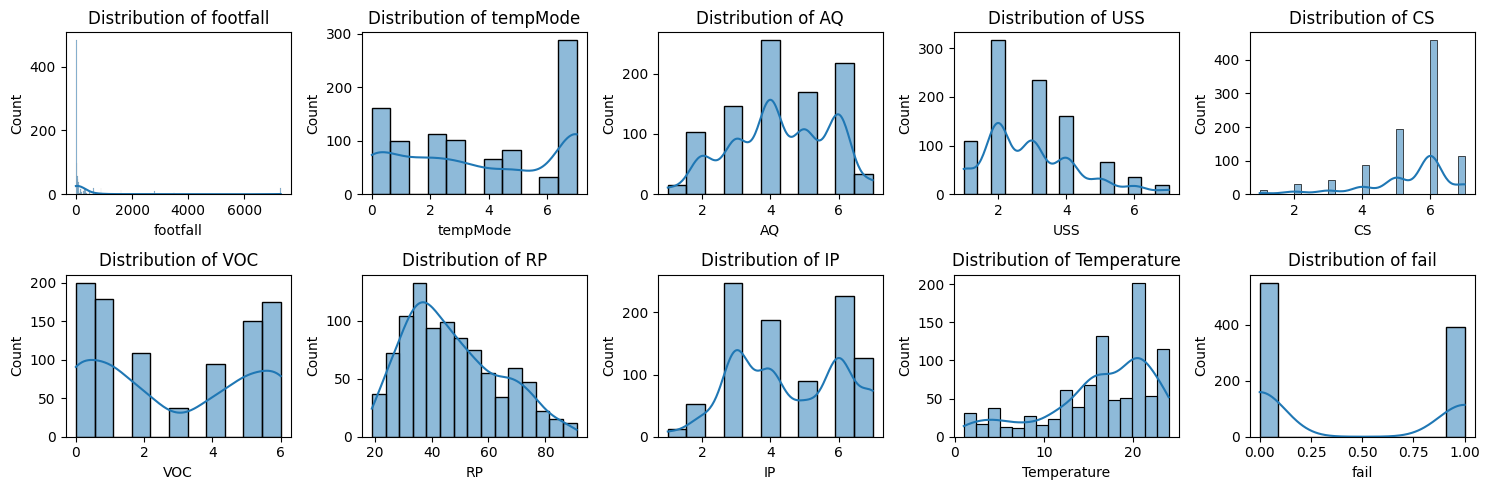

In [9]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 5,figsize=(15, 5))
axes = axes.flatten()  # Flatten the array for easy iteration

for i, column in enumerate(column_name):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    plt.tight_layout()

<Axes: >

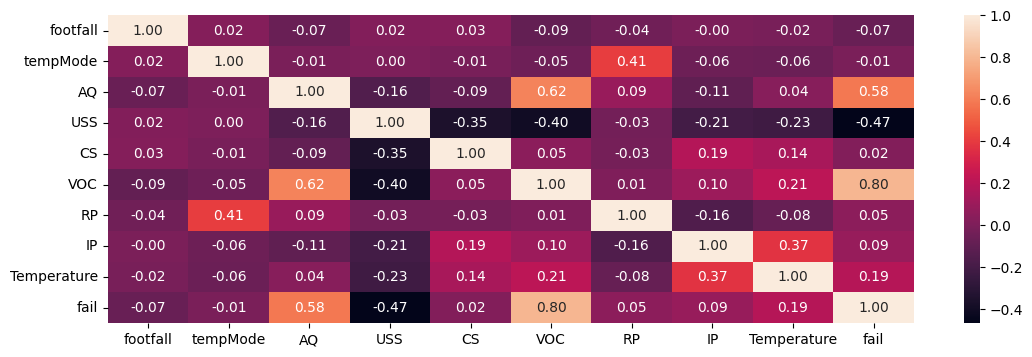

In [10]:
plt.figure(figsize=(13,4))
sns.heatmap(df.corr(),annot=True,fmt =".2f")

In [11]:
#Correlation with output variable
cor_target = abs(df.corr()["fail"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

AQ      0.582895
USS     0.466712
VOC     0.797182
fail    1.000000
Name: fail, dtype: float64

In [12]:
feature_df = df[['AQ','USS','VOC','fail']]
feature_df.head()

,AQ,USS,VOC,fail
0,7,1,6,1
1,3,3,1,0
2,2,2,1,0
3,3,4,1,0
4,5,6,0,0


In [13]:
# take feature and target
X = feature_df.drop('fail',axis=1)
y = feature_df['fail']

In [14]:
# spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10,stratify=y,shuffle=True)

In [15]:
# check shape of data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(754, 3) (754,) (189, 3) (189,)


In [17]:
# prediction on test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       110
           1       0.85      0.87      0.86        79

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189



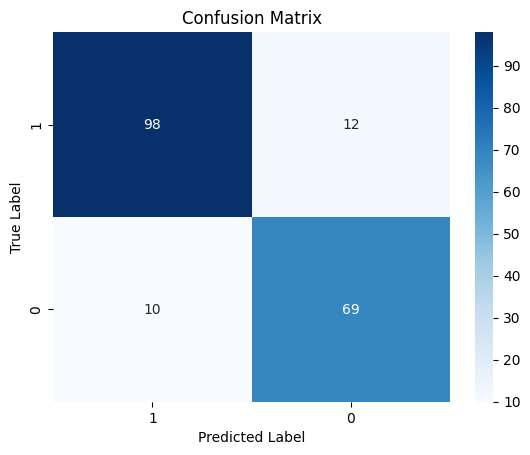

In [18]:
# visualize confusion metrix
cm = confusion_matrix(y_test,y_pred)
plt.Figure(figsize=(14,5))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()